# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** Miranda Quimbar  
**Dataset:** Adult Income  
**Date:** 10/08/2025

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on adult income dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---

## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.

In [57]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ucimlrepo import fetch_ucirepo

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [58]:
# Load your dataset here

# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

df = pd.DataFrame(X)
df = pd.concat([df, y], axis=1)
print(f"Dataset shape: {df.shape}")
df.head()



Dataset shape: (48842, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.


In [59]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()

=== DATASET OVERVIEW ===
Shape: (48842, 15)

Data types:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Missing values:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Basic statistics:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


=== TARGET VARIABLE ===
Target distribution:
income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64


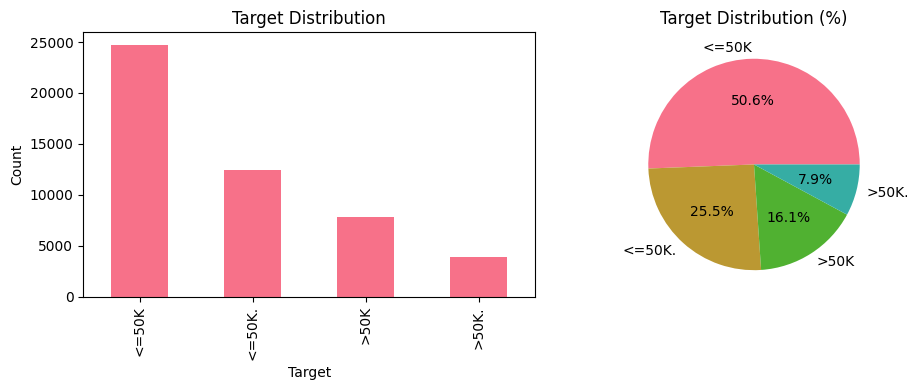

In [60]:
# Target variable analysis
print("=== TARGET VARIABLE ===")
target_counts = df['income'].value_counts()
print(f"Target distribution:")
print(target_counts)

# Visualize target distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
target_counts.plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Target Distribution (%)')

plt.tight_layout()
plt.show()

=== NUMERICAL VARIABLES ===
Numerical columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


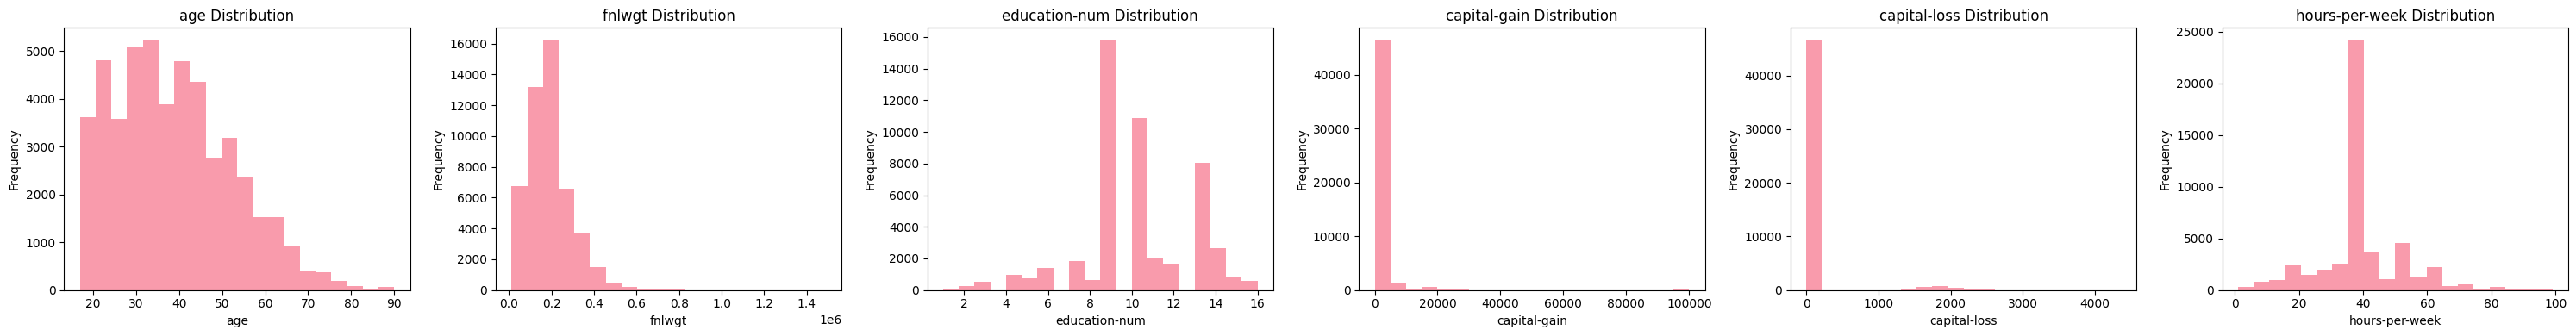

In [61]:
# Numerical variables analysis
print("=== NUMERICAL VARIABLES ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_cols)}")

# Create histograms for numerical variables
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(5*len(numerical_cols), 4))
if len(numerical_cols) == 1:
    axes = [axes]

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

=== CATEGORICAL VARIABLES ===
Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

workclass value counts:
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


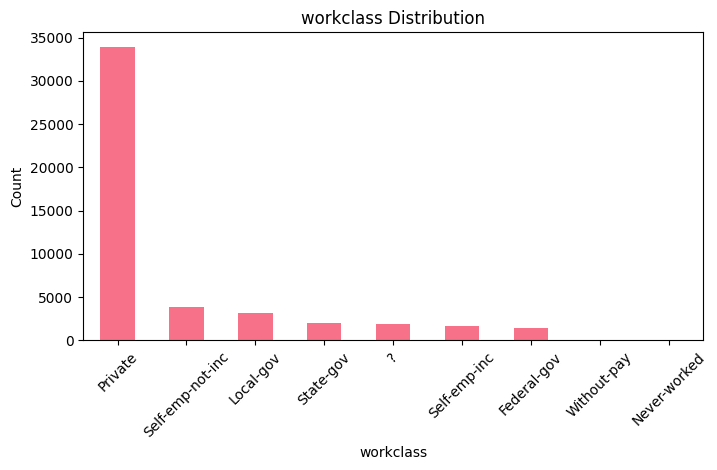


education value counts:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


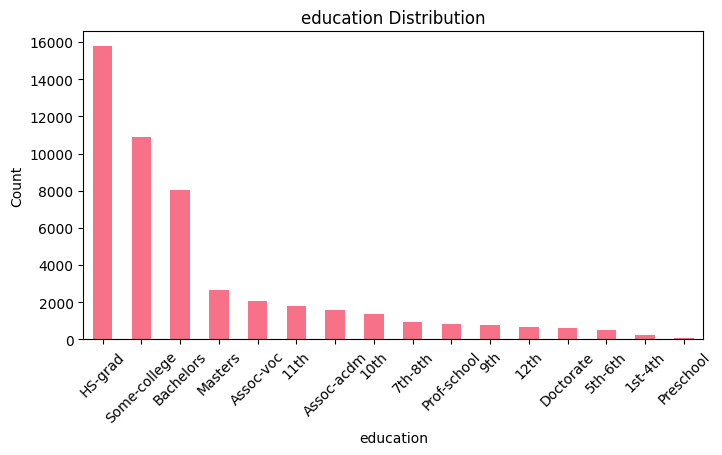


marital-status value counts:
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


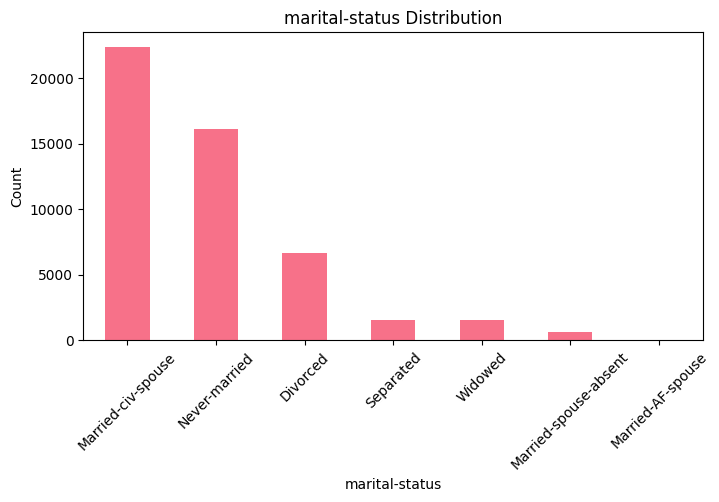


occupation value counts:
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


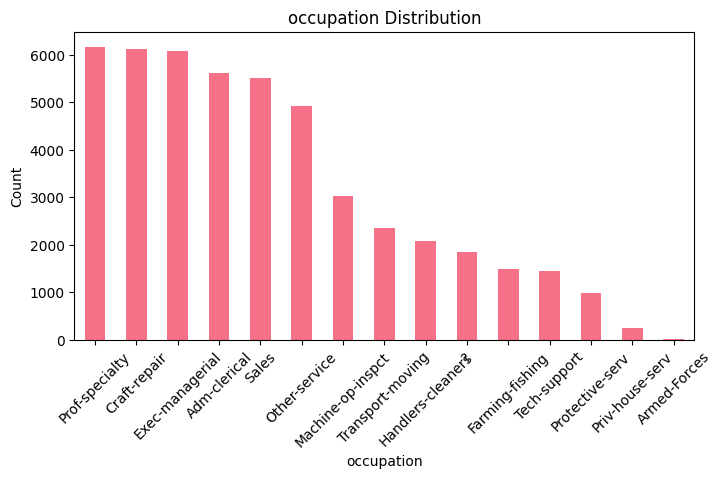


relationship value counts:
relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64


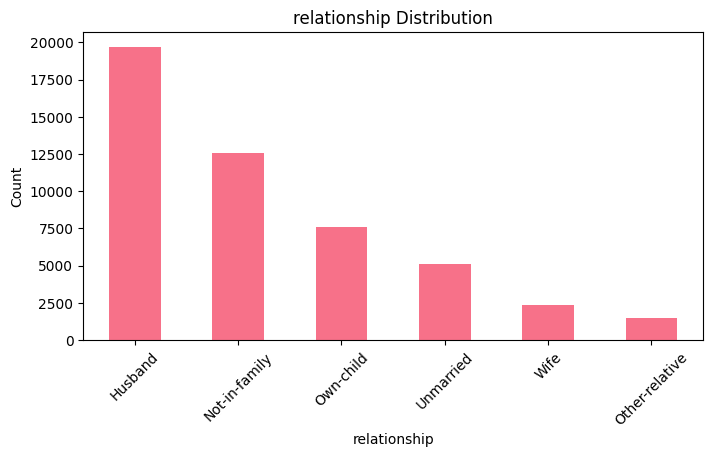


race value counts:
race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64


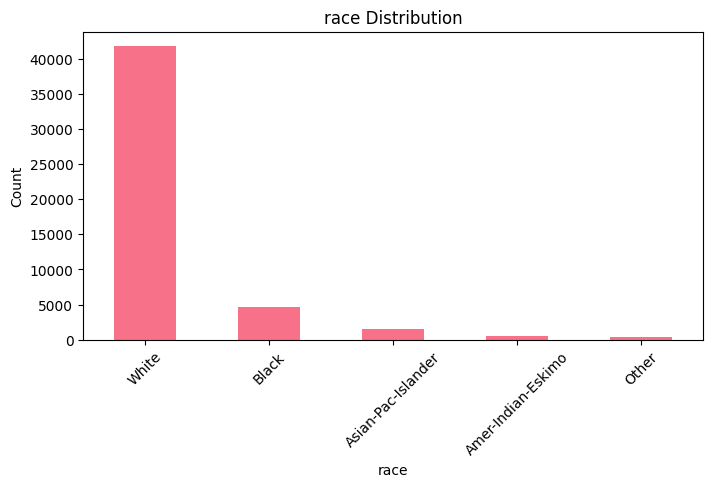


sex value counts:
sex
Male      32650
Female    16192
Name: count, dtype: int64


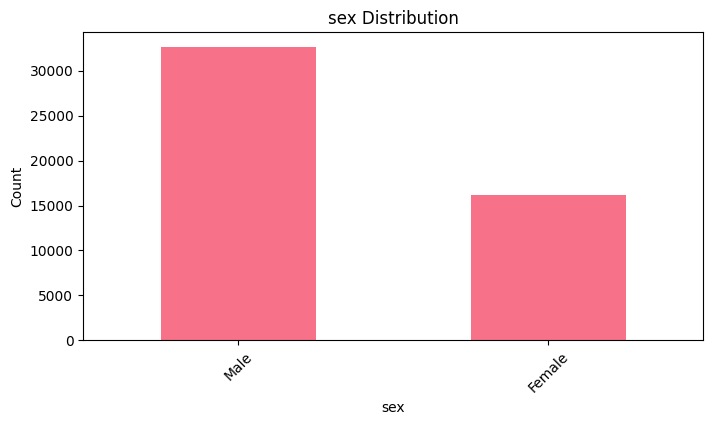


native-country value counts:
native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua          

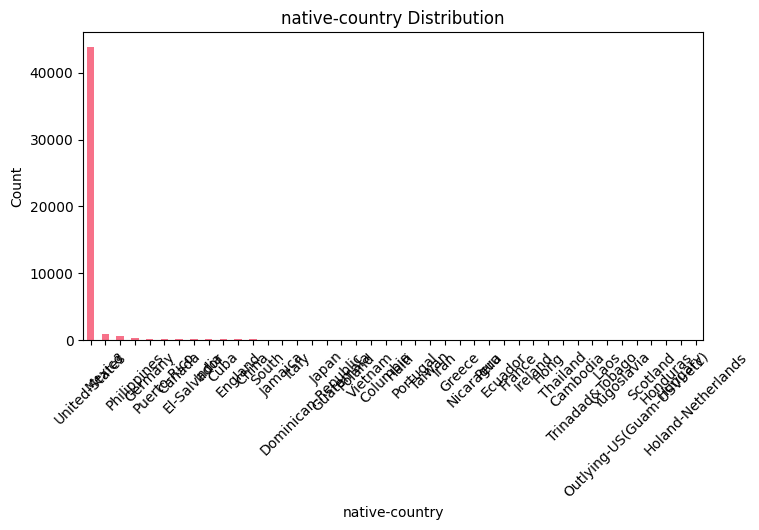


income value counts:
income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64


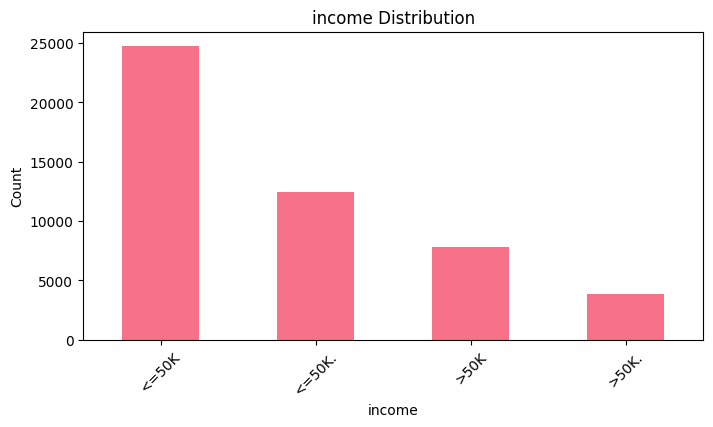

In [62]:
# Categorical variables analysis
print("=== CATEGORICAL VARIABLES ===")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    
    # Create bar plot
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

=== CORRELATION ANALYSIS ===


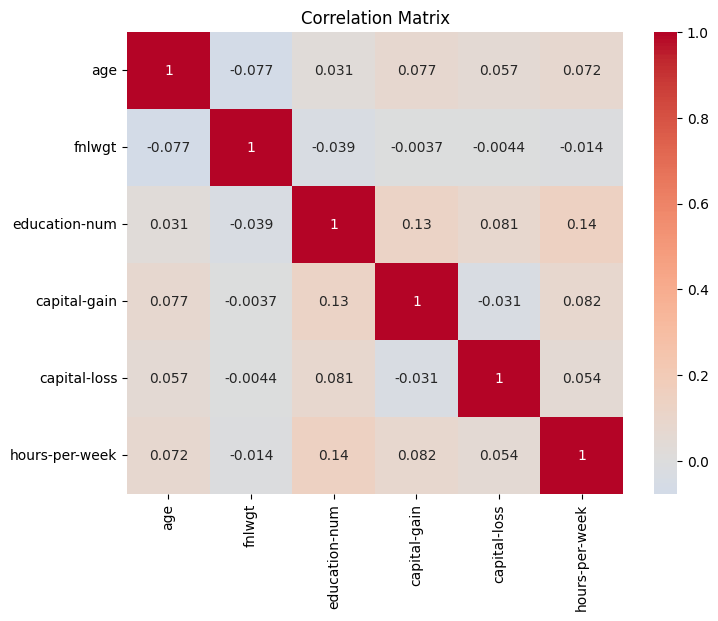

In [63]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Show correlations with target variable
if 'income' in numeric_df.columns:
    target_correlations = correlation_matrix['income'].sort_values(ascending=False)
    print("\nCorrelations with target variable:")
    print(target_correlations)


=== RELATIONSHIPS WITH TARGET ===


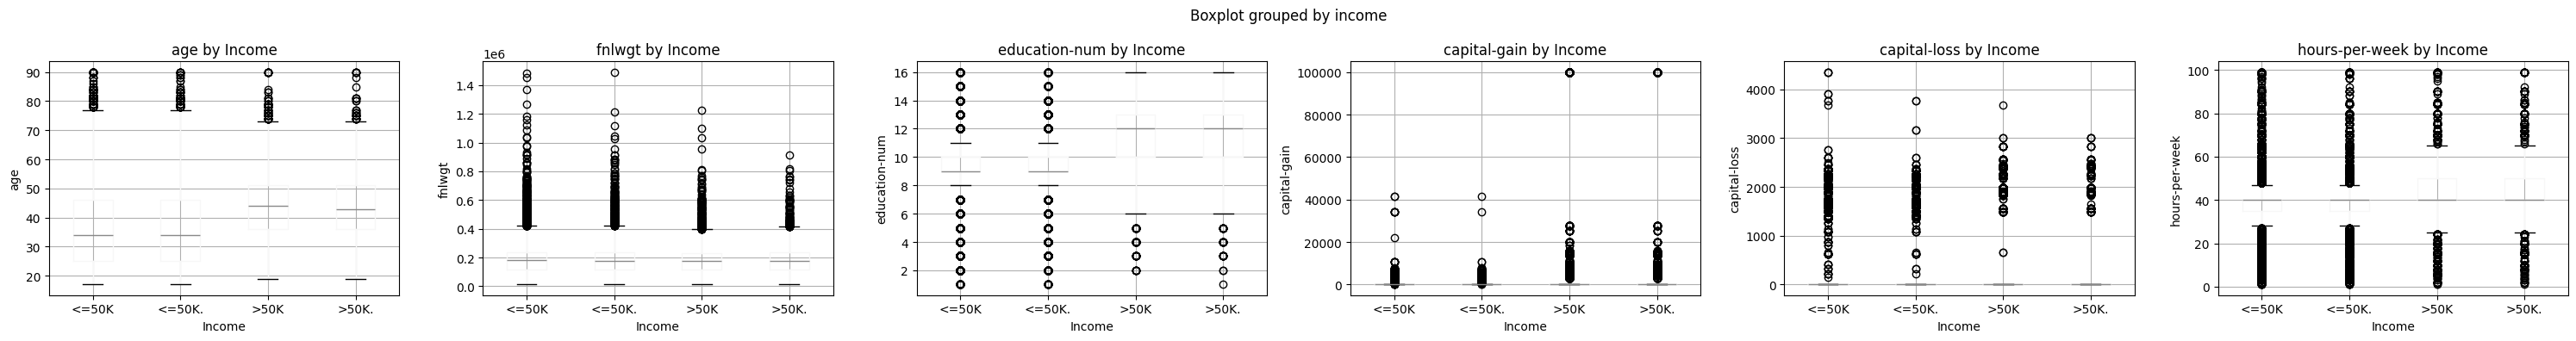


workclass vs Income:
income            <=50K  <=50K.   >50K  >50K.
workclass                                    
?                 0.896   0.000  0.104  0.000
Federal-gov       0.411   0.197  0.259  0.133
Local-gov         0.471   0.234  0.197  0.099
Never-worked      0.700   0.300  0.000  0.000
Private           0.523   0.259  0.146  0.071
Self-emp-inc      0.291   0.155  0.367  0.186
Self-emp-not-inc  0.470   0.251  0.187  0.091
State-gov         0.477   0.255  0.178  0.089
Without-pay       0.667   0.238  0.000  0.095

education vs Income:
income        <=50K  <=50K.   >50K  >50K.
education                                
10th          0.627   0.310  0.045  0.018
11th          0.615   0.334  0.033  0.018
12th          0.609   0.318  0.050  0.023
1st-4th       0.656   0.312  0.024  0.008
5th-6th       0.623   0.324  0.031  0.022
7th-8th       0.635   0.301  0.042  0.023
9th           0.644   0.302  0.036  0.019
Assoc-acdm    0.501   0.241  0.166  0.092
Assoc-voc     0.495   0.251  0

In [64]:
# Relationship between variables and target
print("=== RELATIONSHIPS WITH TARGET ===")

# Box plots for numerical variables vs target
numerical_cols_no_target = [col for col in numerical_cols if col != 'income']

if len(numerical_cols_no_target) > 0:
    fig, axes = plt.subplots(1, len(numerical_cols_no_target), figsize=(5*len(numerical_cols_no_target), 4))
    if len(numerical_cols_no_target) == 1:
        axes = [axes]
    
    for i, col in enumerate(numerical_cols_no_target):
        df.boxplot(column=col, by='income', ax=axes[i])
        axes[i].set_title(f'{col} by Income')
        axes[i].set_xlabel('Income')
        axes[i].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()

# Crosstabs for categorical variables vs target
for col in categorical_cols:
    print(f"\n{col} vs Income:")
    crosstab = pd.crosstab(df[col], df['income'], normalize='index')
    print(crosstab.round(3))


## 3. Hypothesis Formulation

### Hypothesis 1: Education and Income Relationship
**H1:** Individuals with higher education levels have higher income levels.
- **Null Hypothesis (H0):** There is no relationship between income level and education level.
- **Alternative Hypothesis (H1):** There is a significant relationship between education level and income level.
- **Rationale:** Typically, if someone reaches a higher level of education, a job is able to offer a higher income because of their experience. Additionally, pursuing higher education allows an individual to meet education requirements for higher paying jobs, for instance, getting an engineering degree to become an engineer.

### Hypothesis 2: Gender Income Gap
**H2:** There is a significant difference in the income levels of males and females.
- **Null Hypothesis (H0):** There is no difference in the income levels of males and females.
- **Alternative Hypothesis (H1):** There is a significant different in the income levels of males and females.
- **Rationale:** There has been a long-standing issue of differing income levels between males and females (with males usually making more than females), this would test that.

---

## 4. Hypothesis Testing


### Testing Hypothesis 1: Individuals with higher education levels have higher income levels.

**Test Choice:** chi-square
- **Why appropriate:** chi-square test is good for categorical-categorical relationships and education and income are both categorical.

In [65]:
# Hypothesis 1 Testing
print("=== TESTING HYPOTHESIS 1 ===")

# Your code for testing hypothesis 1 here

# 1. Prepare your data
print(f"Education column unique values: {df['education'].unique()}")
print(f"Income column unique values: {df['income'].unique()}")

# 2. Perform the statistical test
contingency_table = pd.crosstab(df['education'], df['income'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

# 3. Interpret results
if p_value < 0.05:
    print("Reject H0: Variables are significantly associated")
else:
    print("Fail to reject H0: No significant association")


=== TESTING HYPOTHESIS 1 ===
Education column unique values: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Income column unique values: ['<=50K' '>50K' '<=50K.' '>50K.']
Chi-square statistic: 6565.7480
p-value: 0.0000
Reject H0: Variables are significantly associated


### Testing Hypothesis 2: There is a significant difference in income levels of males and females.

**Test Choice:** chi-square
- **Why appropriate:** chi-square test is good for categorical-categorical relationships and sex and income are both categorical.


In [66]:
# Hypothesis 2 Testing
print("=== TESTING HYPOTHESIS 2 ===")

# Your code for testing hypothesis 2 here

# 1. Prepare your data
print(f"Gender column unique values: {df['sex'].unique()}")
print(f"Income column unique values: {df['income'].unique()}")

# 2. Perform the statistical test
contingency_table = pd.crosstab(df['sex'], df['income'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

# 3. Interpret results
if p_value < 0.05:
    print("Reject H0: Variables are significantly associated")
else:
    print("Fail to reject H0: No significant association")


=== TESTING HYPOTHESIS 2 ===
Gender column unique values: ['Male' 'Female']
Income column unique values: ['<=50K' '>50K' '<=50K.' '>50K.']
Chi-square statistic: 2250.0324
p-value: 0.0000
Reject H0: Variables are significantly associated


## 5. Summary and Conclusions

### Key Findings from EDA:
1. [List your main observations from the exploratory analysis]
    - The dataset has a good mix between categorical and numerical variables.
    - Significantly more individuals earn less than or equal to $50K compared to the amount of individuals who earn more than $50K.
2. [Describe patterns you identified]
    - Education levels were diverse.
    - There is a pretty large age range for working adults with a pretty big focus on 20-40 year olds, which is typical of the average working adult.
    - Most individuals work 40 hours a week, which is pretty standard of a full-time job.
3. [Note any interesting relationships]
    - Education levels and income levels seemed to have a positive correlation.
    - Amount of hours worked and income levels seemed to have a positive correlation.

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | [Chi-square] | [0.0000] | [Significant] | [Education level is associated with income level] |
| **H2** | [Chi-square] | [0.0000] | [Significant] | [Sex is associated with income level] |


### Key Insights:
- [What do your results tell you about the data?] 
    - Education level does have an impact on income level. Higher education levels are correlated with higher income levels.
    - Gender does have an impact on income level. Males have higher rates of high income levels compared to the females.
- [What are the practical implications?]
    - People should invest in their education as it shows to be a way to achieving higher income levels.
    - Organizations should consider having better equity in their workplaces, ensuring men and women are being paid fairly.
- [What limitations should be considered?]
    - Since this is from the 1990s, it may not accurately describe trends now. Maybe now the gender income gap is smaller (or larger). Maybe now more people are pursuing higher education but it does not have as much impact on their income level (or now there are larger income disparities).

### Future Research:
- Additional analysis could be done on how income levels are changing (or not changing) over time. For instance, with inflation and a rise in cost of living, I feel that incomes should be rising accordingly, which could be analyzed further.
- Other variables that might be important are location as different locations have different costs of living, and therefore a difference in base salaries. Work experience could also be taken into consideration as someone with more work experience is typically offered a higher base salary.

---


In [67]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print(f"Dataset analyzed: [Adult income]")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1]-1} (excluding target)")
print(f"\nAnalysis completed successfully!")


=== ANALYSIS COMPLETE ===
Dataset analyzed: [Adult income]
Sample size: 48842 observations
Number of features: 14 (excluding target)

Analysis completed successfully!
